In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [9]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [10]:
d1 =pd.read_csv("D://GL//Mini Project-1//Mini Project-1//Bank_Personal_Loan_Modelling.csv")   # reading the csv file

In [11]:
d1.head()   # printing the top 5 rows of the Dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
d1.shape    # there are total 5000 rows and 14 columns in the dataset

(5000, 14)

In [13]:
d1.info()   # checking the info details in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [14]:
d1.isnull().sum()    #checking for the Nan Values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

From the above summary, we can see there are no null values present in the dataset.

In [15]:
d1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Performing  EDA

In [16]:
d1.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [17]:
d1.drop((["ID","Experience","ZIP Code"]), axis=1,inplace = True)  

 Dropping the column "Experience" as it is strongly coorelated with Age(Reducing Multicolinearity) ,also dropping the column "ZIP Code" as because it is least correlated

In [18]:
d1.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [19]:
d1["Personal Loan"].value_counts()  # Checking the Value Counts for the Target Varaible- Personal Loan

0    4520
1     480
Name: Personal Loan, dtype: int64

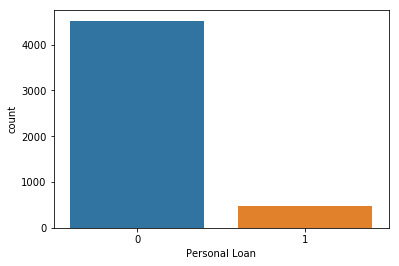

In [20]:
sns.countplot(x='Personal Loan',data=d1)  # checking the count for the Personal loan taken yes or no

In [21]:
count_pl_yes = len(d1[d1['Personal Loan']==1])
count_pl_no = len(d1[d1['Personal Loan']==0])
pct_pl_yes = count_pl_yes/(count_pl_yes+count_pl_no)*100
pct_pl_no = count_pl_no/(count_pl_yes+count_pl_no)*100
print("The Percentage of Personal Loan yes - ",pct_pl_yes )
print("The The Percentage of Personal Loan No - ",pct_pl_no )

The Percentage of Personal Loan yes -  9.6
The The Percentage of Personal Loan No -  90.4


From the above observation, the Ratio in the Target Variable "Personal Loan" class is imbalanced. Therefore we have to balance the class

In [22]:
d1.groupby(["Family","Personal Loan"])["Personal Loan"].count()

Family  Personal Loan
1       0                1365
        1                 107
2       0                1190
        1                 106
3       0                 877
        1                 133
4       0                1088
        1                 134
Name: Personal Loan, dtype: int64

From the above ,we can infer that the Family with more members are likely to accept the personal loan

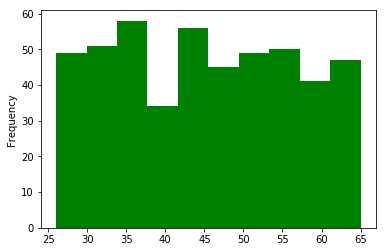

In [23]:
d1[d1['Personal Loan']==1].Age.plot.hist(color='green')

From the above the Graph, we can draw the following insights:
- The Loan has been accepted mostly by the age group 35-38 years years, followed by age group 42-45 years
- From the Age group 38-42 years , there has been huge decline in the loan taken.

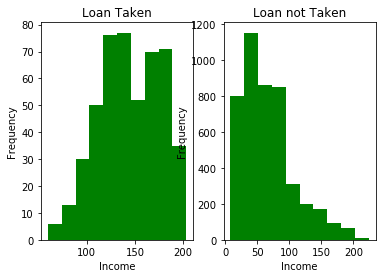

In [24]:
from pylab import *
subplot(1,2,1)
plot(figsize=(20,20))
title('Loan Taken')
plt.xlabel("Income")
d1[d1['Personal Loan']==1].Income.plot.hist(color='green')
subplot(1,2,2)
plot(figsize=(20,20))
title('Loan not Taken')
plt.xlabel("Income")
d1[d1['Personal Loan']==0].Income.plot.hist(color='green')
show()

 The above Graphs shows the comparison the Income Level of People who accepted Loan and did not accept loan
- The Loan accepted was highest by the people whose income level ranges between  120-150
- The Loan accepted was was least by the people whose income level ranges between 40-50


In [25]:
d1.groupby(["Education","Personal Loan"])["Personal Loan"].count()

Education  Personal Loan
1          0                2003
           1                  93
2          0                1221
           1                 182
3          0                1296
           1                 205
Name: Personal Loan, dtype: int64

From the above , we can infer the following insights:
- The people belonging to education category "3" have mostly accepted the loan 
- The people belonging to education category "1" have mostly declined the loan

In [26]:
count=0
for i in range(0,5000):
    if(d1["Personal Loan"].iloc[i]==1 and d1["Securities Account"].iloc[i]==1 and d1["CD Account"].iloc[i]==1 and d1["Online"].iloc[i]==1 and d1["CreditCard"].iloc[i]==1):
        
        count=count+1
print(count)

10


The 10 customers are the most loyal customers of the bank having all the Banking facilities Securities Account,CD account, Online, CreditCard.

# Defining X and Y Variable

In [27]:
d1.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [28]:
X = d1.drop(["Personal Loan"],axis=1) 
Y = d1["Personal Loan"]

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3, stratify=Y ,random_state=2)

# Performing Logistic Regression Prediction

In [30]:
LR=LogisticRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)

C:\Users\S01776\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.9453333333333334


In [32]:
cm=metrics.confusion_matrix(ytest,ypred)
cm

array([[1336,   20],
       [  62,   82]], dtype=int64)

In [33]:
cr = metrics.classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.80      0.57      0.67       144

    accuracy                           0.95      1500
   macro avg       0.88      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



# KNN Alogorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
NNH =  KNeighborsClassifier(n_neighbors= 51 , metric='euclidean')

In [36]:
NNH.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=51, p=2,
                     weights='uniform')

In [37]:
ypred2=NNH.predict(xtest)

In [38]:
accuracy_knn=metrics.accuracy_score(ytest,ypred2)
accuracy_knn

0.9133333333333333

In [39]:
print(metrics.classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1356
           1       0.65      0.21      0.32       144

    accuracy                           0.91      1500
   macro avg       0.79      0.60      0.63      1500
weighted avg       0.90      0.91      0.89      1500



# Naive Bayes Algorithm

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
NB=GaussianNB()

In [42]:
NB.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
ypred3= model.predict(xtest)

NameError: name 'model' is not defined

In [44]:
acc_NB=metrics.accuracy_score(ytest,ypred3)
acc_NB

NameError: name 'ypred3' is not defined

In [45]:
cm_NB = metrics.confusion_matrix(ytest,ypred3)
cm_NB

NameError: name 'ypred3' is not defined

In [46]:
print(metrics.classification_report(ytest,ypred3))

NameError: name 'ypred3' is not defined

# Based on the above Predction models, following are the observations:

###  Accuracy Score
- Logistic Regression - 94%
- KNN Alogorithm - 91%
- Naive Bayes Algorithm - 89%

Therefore based on the accuracy score, we can observe that the Logistic Regression model is performig the best with 91% accuracy  as compared with other models

### Recall Score
- Logistic Regression - 62%
- KNN Alogorithm - 21%
- Naive Bayes Algorithm - 60%

Based on Recall Score, we can observe all the models are not performing well. The Logistic Regression model is still the better model for prediction as it has highest Recall score followed by Naive Bayes.
Whereas KNN is the least with 21% recall score

# Performing Standard Scaling to normalize the data for better Prediction

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
SC =StandardScaler()

In [49]:
#scaling the dataset
xtrain_scaled=SC.fit_transform(xtrain)
xtest_scaled=SC.fit_transform(xtest)

# Performing Logistic Regression Using Scaled Data

In [50]:
LR2=LogisticRegression()
LR2.fit(xtrain_scaled,ytrain)
ypred_LR=LR2.predict(xtest_scaled)

C:\Users\S01776\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
acc_LR=metrics.accuracy_score(ytest,ypred_LR)
print(acc_LR)

0.9513333333333334


In [52]:
cm_LR = metrics.confusion_matrix(ytest,ypred_LR)
cm_LR

array([[1337,   19],
       [  54,   90]], dtype=int64)

In [53]:
print( metrics.classification_report(ytest,ypred_LR))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



# Performing KNN Using Scaled Data

In [54]:
NNH_Scaled = NNH.fit(xtrain_scaled,ytrain)

In [55]:
ypred_scaled_NNH = NNH_Scaled.predict(xtest_scaled)

In [56]:
acc_NNH_scaled= metrics.accuracy_score(ytest,ypred_scaled_NNH)
acc_NNH_scaled

0.936

In [57]:
print(metrics.confusion_matrix(ytest,ypred_scaled_NNH))

[[1354    2]
 [  94   50]]


In [58]:
print(metrics.classification_report(ytest,ypred_scaled_NNH))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1356
           1       0.96      0.35      0.51       144

    accuracy                           0.94      1500
   macro avg       0.95      0.67      0.74      1500
weighted avg       0.94      0.94      0.92      1500



# Performing Naive Bayes Algorithm Using Scaled Data

In [59]:
NB_scaled=NB.fit(xtrain_scaled,ytrain)

In [60]:
NB_predict=NB_scaled.predict(xtest_scaled)

In [61]:
acc_NB_scaled=metrics.accuracy_score(ytest,NB_predict)
acc_NB_scaled

0.8846666666666667

In [62]:
print(metrics.confusion_matrix(ytest,NB_predict))

[[1241  115]
 [  58   86]]


In [63]:
print(metrics.classification_report(ytest,NB_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.93      1356
           1       0.43      0.60      0.50       144

    accuracy                           0.88      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.90      0.88      0.89      1500



After Scaling the Data , below are the observations:
### The accuracy score
- Logistic Regression- 95%
- KNN Algorithm- 93%
- Naive Bayes Algorithm- 88%

### Recall Score
- Logistic Regression- 62%
- KNN Algorithm- 35%
- Naive Bayes Algorithm- 60%

Based on the accuracy Score Logistic Regression is outperforming comparing with other models
Based on the Recall Score again Logistic Regression is performing better.

### Conclusion

Thus Based on the above prediction models built  on both scaled and unscaled data. We can infer that 
Logistic Regression is the best model for making prediction as becasue the accuarcy score and recall score are better as compared with other models.